In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [50]:
deaths = pd.read_csv("deaths-in-galicia.csv", encoding='latin-1')
deaths[deaths['Tempo'].str.len() > 4]

,CodTempo,Tempo,CodEspazo,Espazo,DatoN,DatoT
375,199701,1997/Xaneiro,12,12 Galicia,3544.0,3.544
376,199701,1997/Xaneiro,15,15 A Coruña,1326.0,1.326
377,199701,1997/Xaneiro,15001,15001 Abegondo,9.0,9
378,199701,1997/Xaneiro,15002,15002 Ames,26.0,26
379,199701,1997/Xaneiro,15003,15003 Aranga,8.0,8
...,...,...,...,...,...,...
107245,201551,2018/Decembro,3608,3608 O Salnés,101.0,101
107246,201551,2018/Decembro,3609,3609 Tabeirós-Terra de Montes,18.0,18
107247,201551,2018/Decembro,3610,3610 Vigo,340.0,340
107248,201551,2018/Decembro,36901,"36901 Illa de Arousa, A",2.0,2


/Users/oscar/miniconda3/envs/py_dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/oscar/miniconda3/envs/py_dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[Text(0, 0.5, 'Mortes'),
 Text(0.5, 0, 'Meses'),
 Text(0.5, 1.0, 'Media das mortes en Galicia según mes')]

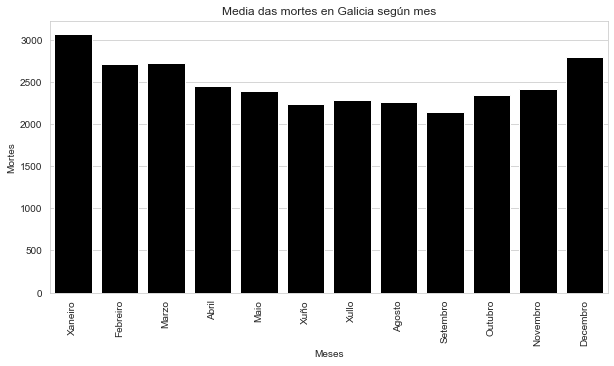

In [55]:
total = deaths[(deaths['Tempo'].str.len() > 4) & (deaths['Espazo'] == "12 Galicia")]
total['Mes'] = total['Tempo'].apply(lambda x:x.split('/')[-1])
meses = ['Xaneiro', 'Febreiro', 'Marzo', 'Abril', 'Maio', 'Xuño', 'Xullo', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Decembro']
total['Num Mes'] = total['Mes'].apply(lambda x:meses.index(x))
avg_deaths_by_month = total.groupby('Num Mes').mean()

plt.figure(figsize=(10,5))
plot = sns.barplot(x=meses, y=avg_deaths_by_month['DatoN'], color='black')
plot.set_xticklabels(labels=meses, rotation=90)
plot.set(title='Media das mortes en Galicia según mes', xlabel='Meses', ylabel='Mortes')